**BIOS512 Final**

**Men's Tennis Grand Slam Data**

In [2]:
library(tidyverse)
library(cluster)
library(factoextra)
theme_set(theme_minimal(base_size = 16))
df <- read_csv("Mens_Tennis_Grand_Slam_Winner.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.6
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   4.0.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.1
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Rows: 292 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): TOURNAMENT, WINNER, RUNNER-UP, WINNER_NATIONALITY, WINNER_LEFT_OR_R...
dbl (4): YEAR, WINNER_ATP_RANKING, RUNNER-UP_ATP_RANKING, WINNER_PRIZE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_ty

*Codebook*

In [3]:
library(tibble)

codebook <- tibble(
  column = c(
    "YEAR",
    "TOURNAMENT",
    "WINNER",
    "RUNNER-UP",
    "WINNER_NATIONALITY",
    "WINNER_ATP_RANKING",
    "RUNNER-UP_ATP_RANKING",
    "WINNER_LEFT_OR_RIGHT_HANDED",
    "TOURNAMENT_SURFACE",
    "WINNER_PRIZE"
  ),
  description = c(
    "Year of the tournament",
    "Tournament name (Grand Slam)",
    "Winner name",
    "Runner-up name",
    "Winner nationality",
    "Winner ATP ranking entering the tournament",
    "Runner-up ATP ranking entering the tournament",
    "Winner playing hand (left or right handed)",
    "Court surface type",
    "Winner prize money"
  )
)

codebook


column,description
<chr>,<chr>
YEAR,Year of the tournament
TOURNAMENT,Tournament name (Grand Slam)
WINNER,Winner name
RUNNER-UP,Runner-up name
WINNER_NATIONALITY,Winner nationality
WINNER_ATP_RANKING,Winner ATP ranking entering the tournament
RUNNER-UP_ATP_RANKING,Runner-up ATP ranking entering the tournament
WINNER_LEFT_OR_RIGHT_HANDED,Winner playing hand (left or right handed)
TOURNAMENT_SURFACE,Court surface type


**Question 1: How do the rankings of the winners compare to the rankings of the runner ups?**

Warning message:
“Removed 229 rows containing missing values or values outside the scale range
(`geom_point()`).”



Call:
glm(formula = win_top2 ~ `RUNNER-UP_ATP_RANKING`, family = binomial(), 
    data = model_df)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)  
(Intercept)               1.3177     0.5312    2.48   0.0131 *
`RUNNER-UP_ATP_RANKING`  -0.0181     0.1206   -0.15   0.8807  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 66.743  on 62  degrees of freedom
Residual deviance: 66.721  on 61  degrees of freedom
  (229 observations deleted due to missingness)
AIC: 70.721

Number of Fisher Scoring iterations: 4


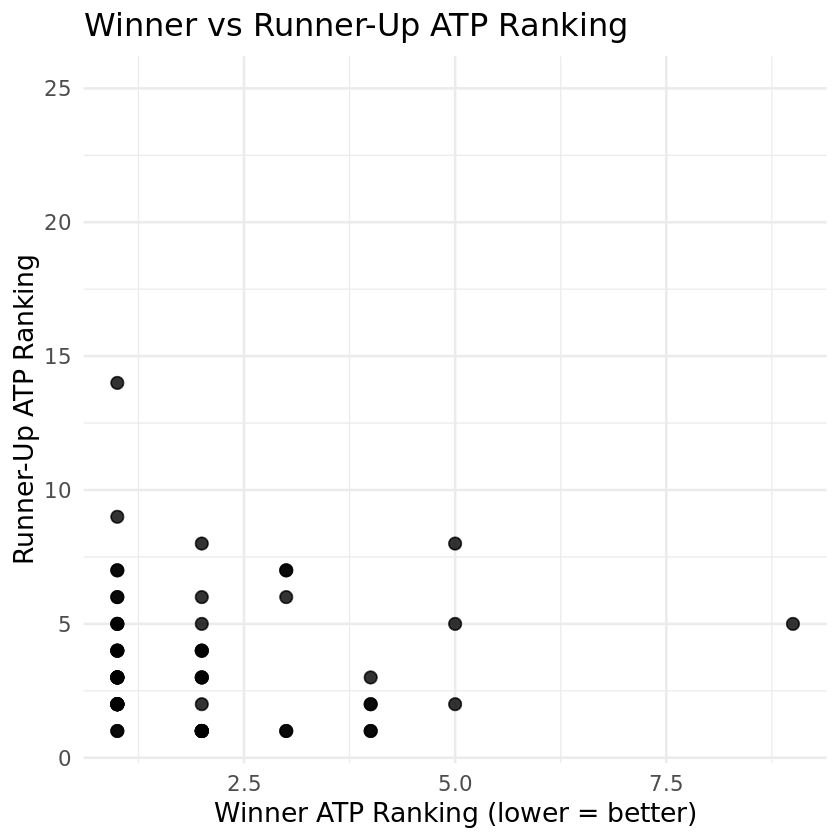

In [4]:
df %>%
  ggplot(aes(x = WINNER_ATP_RANKING, y = `RUNNER-UP_ATP_RANKING`)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "Winner vs Runner-Up ATP Ranking",
    x = "Winner ATP Ranking (lower = better)",
    y = "Runner-Up ATP Ranking"
  )

model_df <- df %>%
  mutate(win_top2 = if_else(WINNER_ATP_RANKING <= 2, 1, 0))

mod <- glm(win_top2 ~ `RUNNER-UP_ATP_RANKING`,
           data = model_df,
           family = binomial())
summary(mod)

The warning message in this plot corresponds to the amount of players who played in the ATP final and were not ranked. This plot shows that the most amount of finalist are both very high ranked (in the top 10 for runner-ups and in the top 5 for the winner). 

**Question 2: Is there a realtionship between ATP ranking and the amount of prize money earned?**

Warning message:
“Removed 229 rows containing missing values or values outside the scale range
(`geom_point()`).”



Call:
lm(formula = WINNER_PRIZE ~ WINNER_ATP_RANKING, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1340667  -707457  -155247   309753  2079333 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1926086     200925   9.586 8.76e-14 ***
WINNER_ATP_RANKING   114581      81704   1.402    0.166    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 942200 on 61 degrees of freedom
  (229 observations deleted due to missingness)
Multiple R-squared:  0.03123,	Adjusted R-squared:  0.01535 
F-statistic: 1.967 on 1 and 61 DF,  p-value: 0.1659


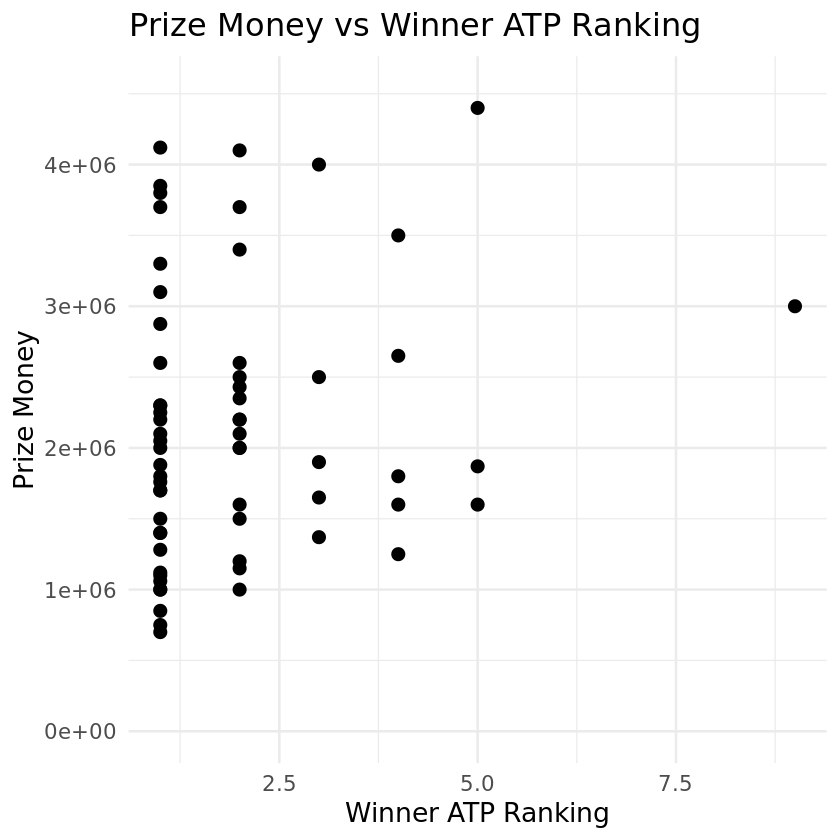

In [5]:
df %>%
  ggplot(aes(x = WINNER_ATP_RANKING, y = WINNER_PRIZE)) +
  geom_point(size = 3) +
  labs(
    title = "Prize Money vs Winner ATP Ranking",
    x = "Winner ATP Ranking",
    y = "Prize Money"
  )

mod2 <- lm(WINNER_PRIZE ~ WINNER_ATP_RANKING, data = df)
summary(mod2)


Like question 1, the 229 rows that were not included in this plot refer to winners who were not ranked. This plot indicates that higher ranked players tend to win tournaments with higher prize money. 

**Question 3: Can we identify natural groupings of matches based on rankings and prize money?**

K-means clustering with 3 clusters of sizes 13, 37, 13

Cluster means:
  WINNER_ATP_RANKING RUNNER-UP_ATP_RANKING WINNER_PRIZE
1          0.5360719            -0.1924349    1.5332093
2         -0.2290659            -0.4515534   -0.4924817
3          0.1158849             1.4776252   -0.1315307

Clustering vector:
 [1] 2 3 3 1 2 3 2 2 2 3 1 1 2 2 1 1 3 3 1 3 3 3 1 1 2 2 1 1 2 2 1 1 2 2 1 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 3 2 2 2 3

Within cluster sum of squares by cluster:
[1] 40.34092 34.48431 29.15497
 (between_SS / total_SS =  44.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

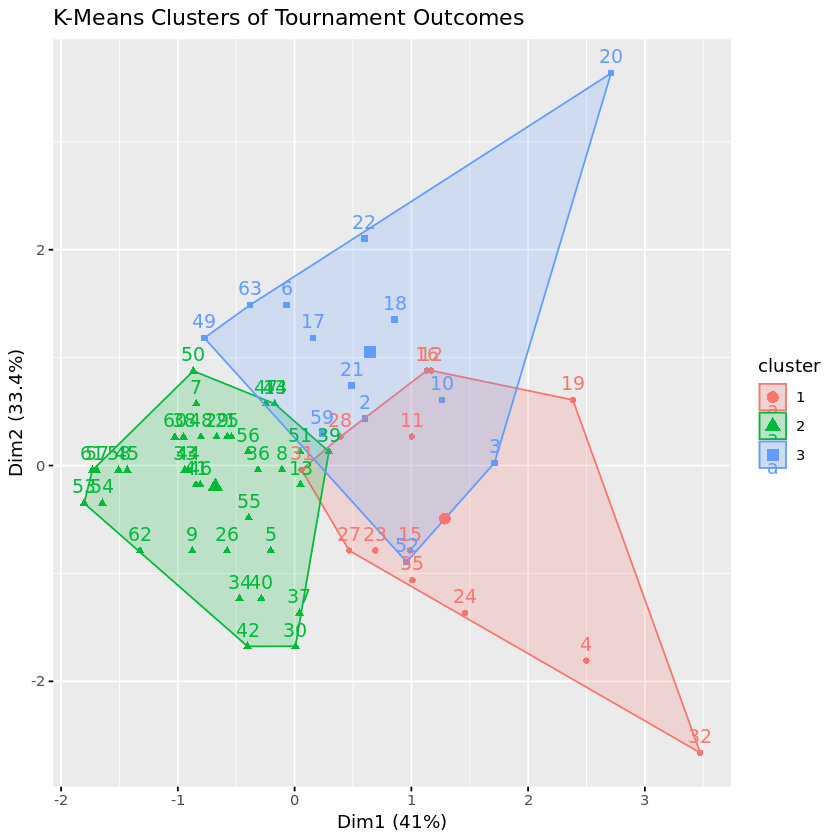

In [6]:
clust_df <- df %>%
  select(WINNER_ATP_RANKING, `RUNNER-UP_ATP_RANKING`, WINNER_PRIZE) %>%
  drop_na() %>%
  scale()

set.seed(1)
km <- kmeans(clust_df, centers = 3, nstart = 25)
km

fviz_cluster(km, data = clust_df,
             main = "K-Means Clusters of Tournament Outcomes")

Clustering reveals several things about this data. First, Cluster 1 (the red cluster) indicates that the high prize events (grand slams and ATP 1000 level tournaments) have very few upsets. Cluster 2 respresents shows a consistency in the lower prized events (ATP 250 tournaments). There seems to be consistent strong finalsits at those tournaments. As for Cluster 2, it seems that there are very mismatched finals for middle tier tournaments (ATP 500 levels).

**Question 4: What are the main directions of variation in the tournament data?**

Importance of components:
                          PC1    PC2    PC3
Standard deviation     1.1096 1.0010 0.8757
Proportion of Variance 0.4104 0.3340 0.2556
Cumulative Proportion  0.4104 0.7444 1.0000

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”


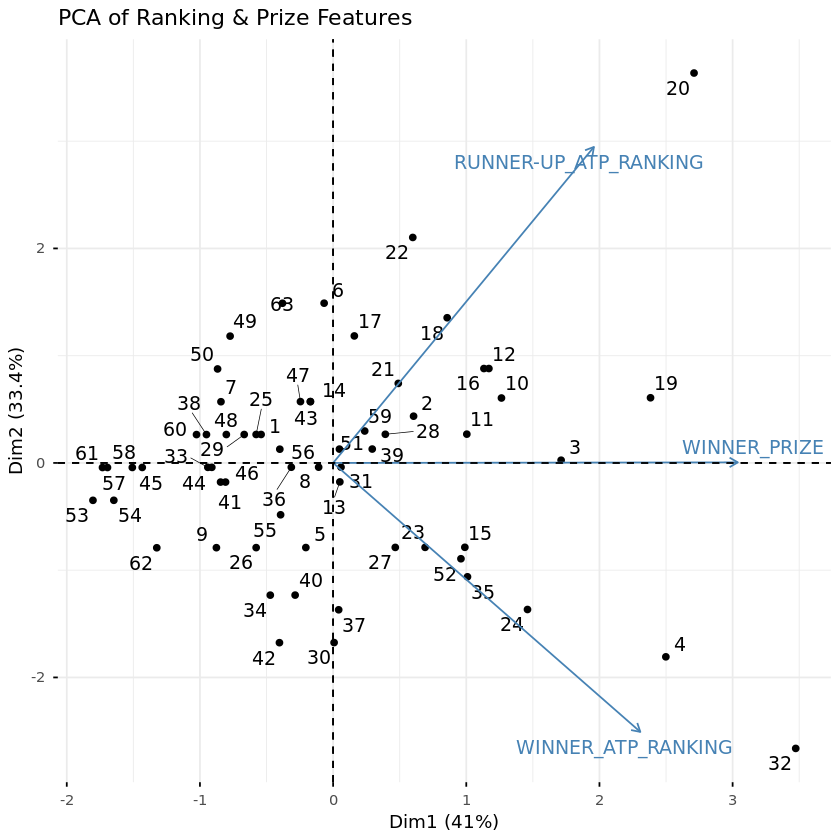

In [7]:
pca <- prcomp(clust_df, scale. = FALSE)
summary(pca)

fviz_pca_biplot(pca, repel = TRUE,
                title = "PCA of Ranking & Prize Features")

This PCA plot shows that the strongest driver in data variation is tournament prize money. Runner up and winner strength also indicate a strong second line of data variation. ATP ranking can also be used, however, not all individuals included in this data set are ranked and would be considered null values. Therefore, this PCA analysis confirms the clustering from Question 3. 

**Question 5: Does the surface type influence the ATP ranking of tournament winners?**

Warning message:
“Removed 229 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


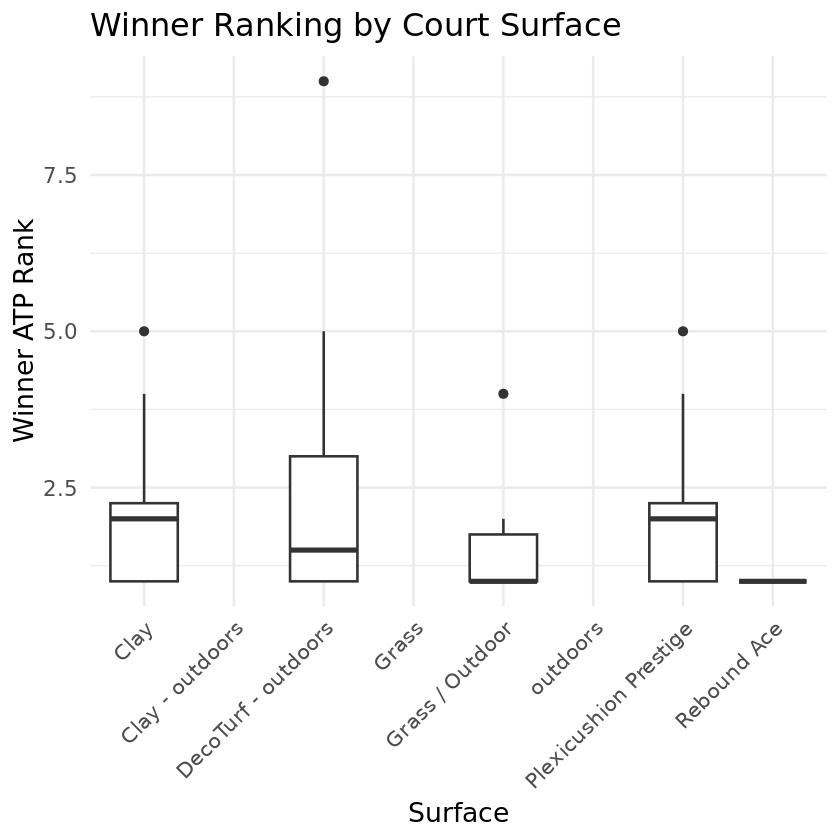

In [9]:
df %>%
  ggplot(aes(x = TOURNAMENT_SURFACE, y = WINNER_ATP_RANKING)) +
  geom_boxplot() +
  labs(
    title = "Winner Ranking by Court Surface",
    x = "Surface",
    y = "Winner ATP Rank"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


This box plot indicates that generally the decoturf surface has the most variablity in atp ranking winners. Grass, alternatively, tends to have higher ranked atp winners. This makes sense as the grass season is considered extremely prestigous as it inlcudes primarily Wimbledon. 